1.Import and Dataset Load

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import Counter

In [13]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


2.Initial Exploration and Info

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [15]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

3.Data Cleaning and Preprocessing

In [16]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['rating'] = df['rating'].fillna('Not Rated')
df['country'] = df['country'].fillna('Unkown')
df['director'] = df['director'].fillna('No Director')
df['cast'] = df['cast'].fillna('No Cast')

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)').fillna('Unkown')

df.drop_duplicates(inplace=True)

text_cols = ['title', 'type', 'rating', 'duration_type']
for col in text_cols:
    df[col] = df[col].str.strip()

df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_int,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0,90.0,min
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unkown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Unkown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0,1.0,Season
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0,2.0,Seasons


4.Basic data analysis

4.1 Type of content

C:\Users\VINOD\AppData\Local\Temp\ipykernel_11236\716300261.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


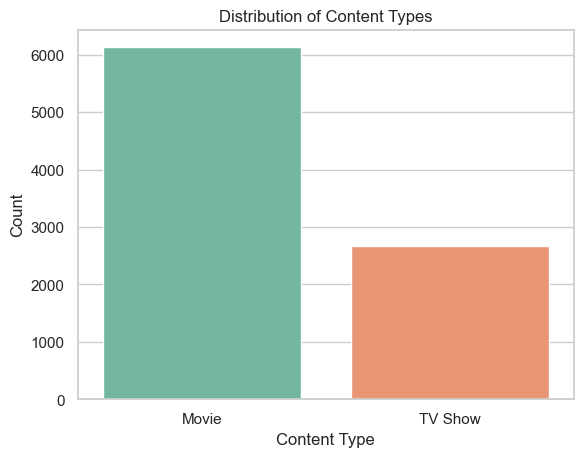

In [17]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Types')
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

4.2 Content Addition Trend Over years

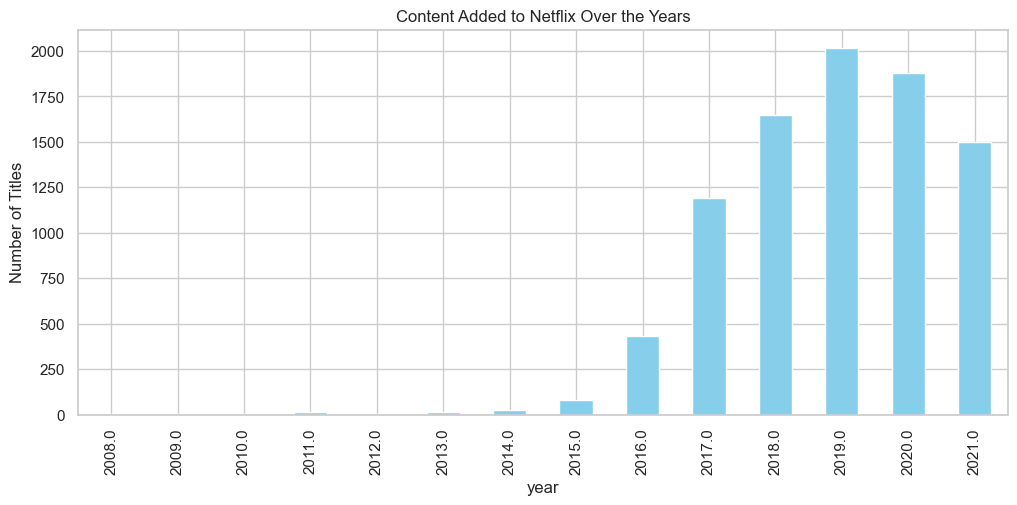

In [18]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,5), color='skyblue')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


4.3 Top 10 Countries producing Content

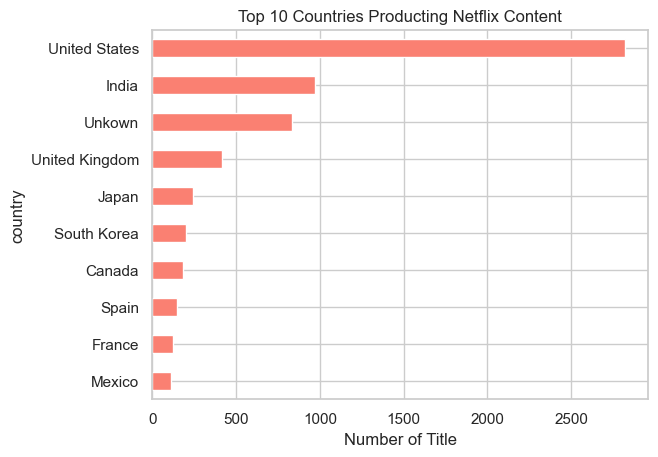

In [19]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='salmon')
plt.title('Top 10 Countries Producting Netflix Content')
plt.xlabel('Number of Title')
plt.gca().invert_yaxis()
plt.show()

4.4 Top rating Distribution

C:\Users\VINOD\AppData\Local\Temp\ipykernel_11236\1490564258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating',order=df['rating'].value_counts().index[:10],palette='cool')


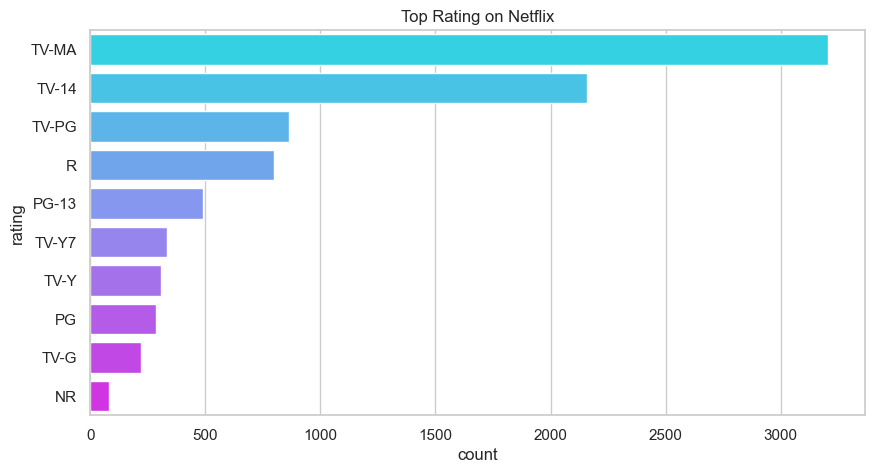

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='rating',order=df['rating'].value_counts().index[:10],palette='cool')
plt.title('Top Rating on Netflix')
plt.show()


4.5 Genre Frequency Analysis

C:\Users\VINOD\AppData\Local\Temp\ipykernel_11236\3057971235.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()),palette='viridis')


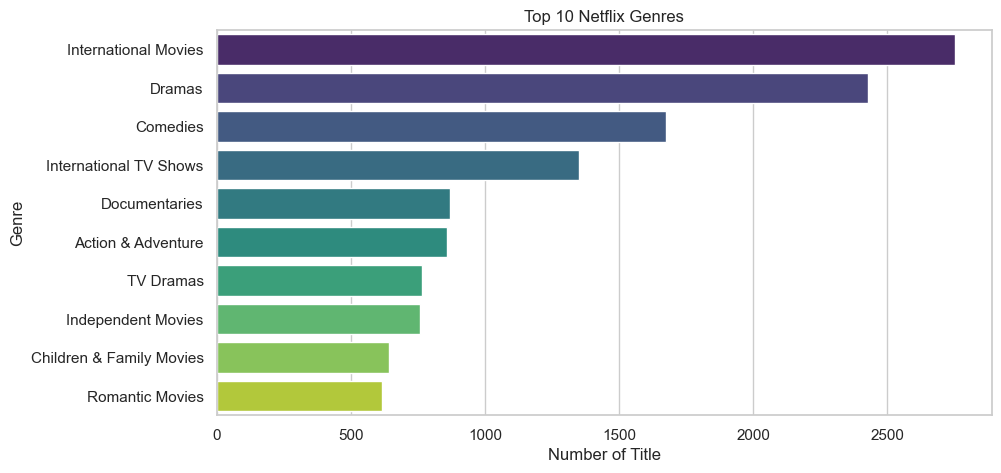

In [21]:
genre_list = ','.join(df['listed_in']).split(',')
genres = [g.strip() for g in genre_list]
genre_counts = Counter(genres)

top_genres = dict(sorted(genre_counts.items(),key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10,5))
sns.barplot(x=list(top_genres.values()), y=list(top_genres.keys()),palette='viridis')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Title')
plt.ylabel('Genre')
plt.show()

4.6 Movie vs TV Show Duration Distribution 

C:\Users\VINOD\AppData\Local\Temp\ipykernel_11236\1193858753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['duration_type'].isin(['min','Seasons'])],x='type',y='duration_int', palette='pastel')


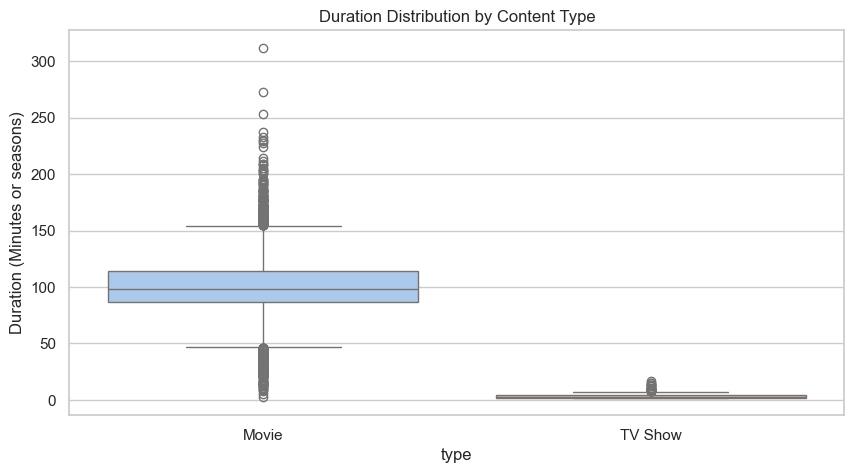

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['duration_type'].isin(['min','Seasons'])],x='type',y='duration_int', palette='pastel')
plt.title('Duration Distribution by Content Type')
plt.ylabel('Duration (Minutes or seasons)')
plt.show()

1. Content Growth Trend by Type Over the Years

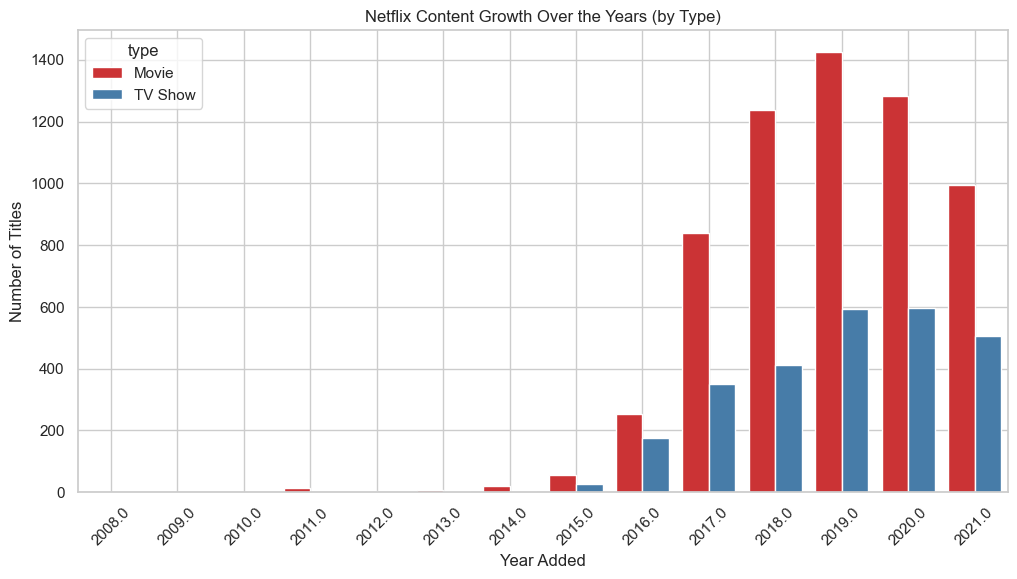

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['year_added'].notnull()],x='year_added',hue='type',palette='Set1')
plt.title('Netflix Content Growth Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


2.Monthly Addition Heatmap

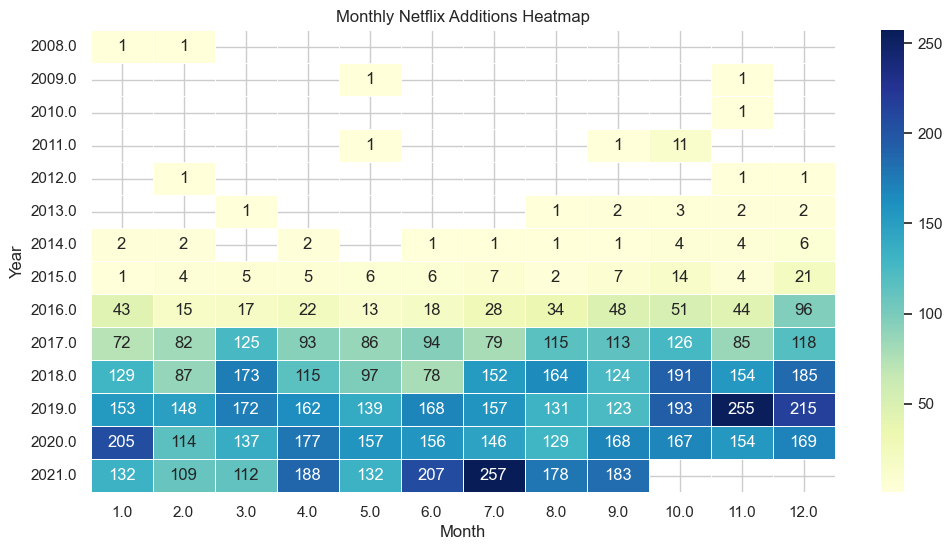

In [27]:
heatmap_data = df.pivot_table(index='year_added',
                              columns='month_added',
                              values='show_id',
                              aggfunc='count')
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu',linewidths=0.5,annot=True,fmt='g')
plt.title('Monthly Netflix Additions Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

3.Stacked Bar Plot of Content by Top 5 Countries and Type

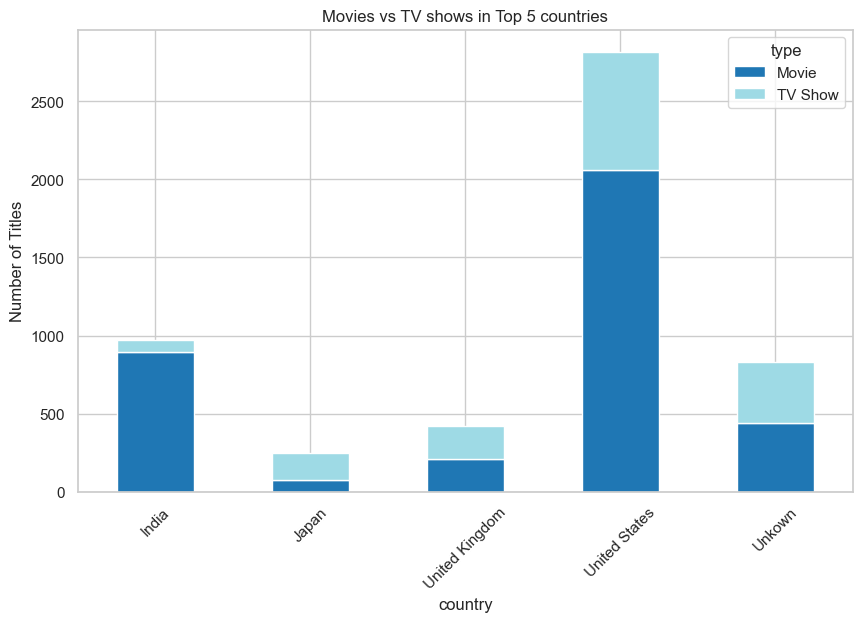

In [29]:
top_5_countries = df['country'].value_counts().head(5).index.tolist()
df_top_countries = df[df['country'].isin(top_5_countries)]

grouped = df_top_countries.groupby(['country','type']).size().unstack(fill_value=0)

grouped.plot(kind='bar',stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Movies vs TV shows in Top 5 countries')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='type')
plt.show()

4. WordCloud of cast Members

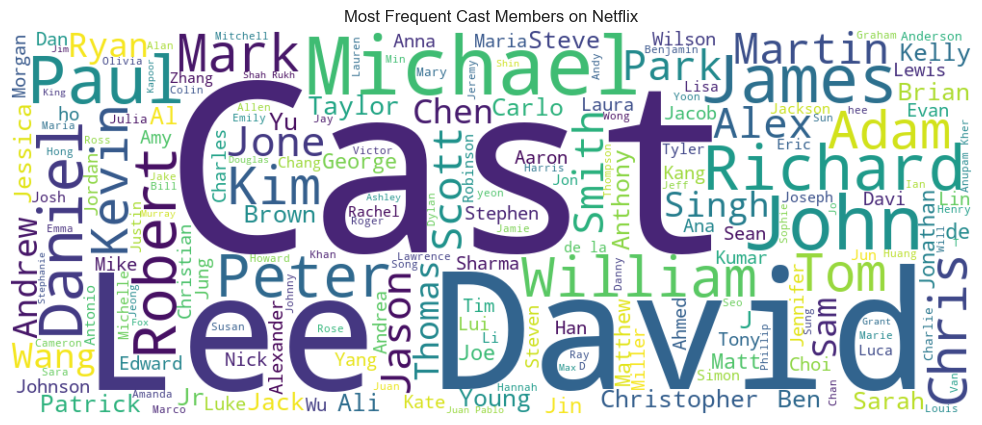

In [31]:
from wordcloud import WordCloud

cast_data = ' '.join(df['cast'].dropna().tolist())
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(cast_data)

plt.figure(figsize=(15,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Cast Members on Netflix')
plt.show()

5.Duration Analysis by content Type

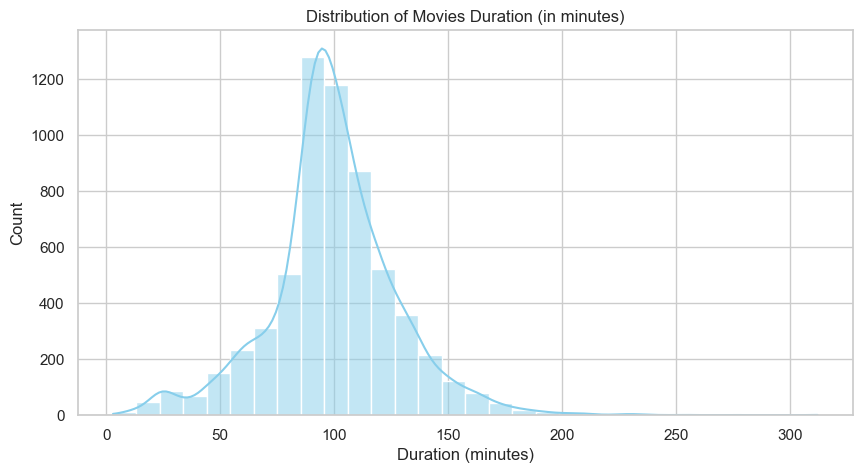

In [33]:
plt.figure(figsize=(10,5))
sns.histplot(data=df[df['duration_type']=='min'],x='duration_int', bins=30,kde=True,color='skyblue')
plt.title('Distribution of Movies Duration (in minutes)')
plt.xlabel('Duration (minutes)')
plt.show()


C:\Users\VINOD\AppData\Local\Temp\ipykernel_11236\4255793855.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['duration_type']=='Seasons'],x='duration_int', palette='rocket')


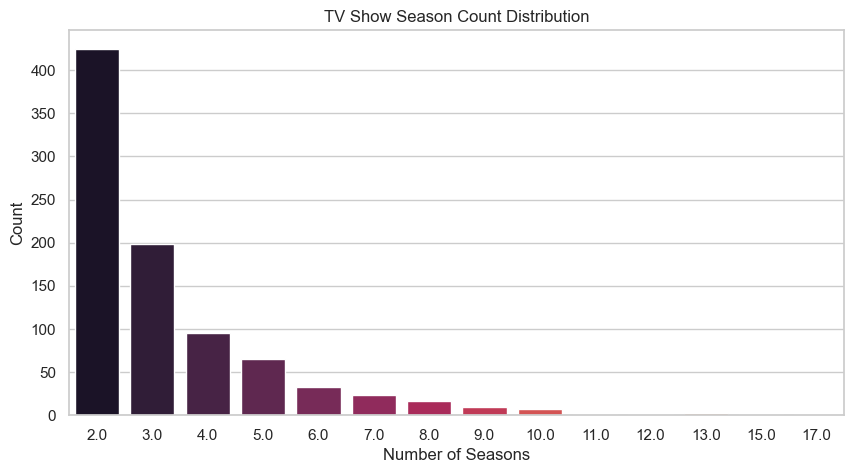

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df[df['duration_type']=='Seasons'],x='duration_int', palette='rocket')
plt.title('TV Show Season Count Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Count')
plt.show()

6.Genre Correlation Matrix

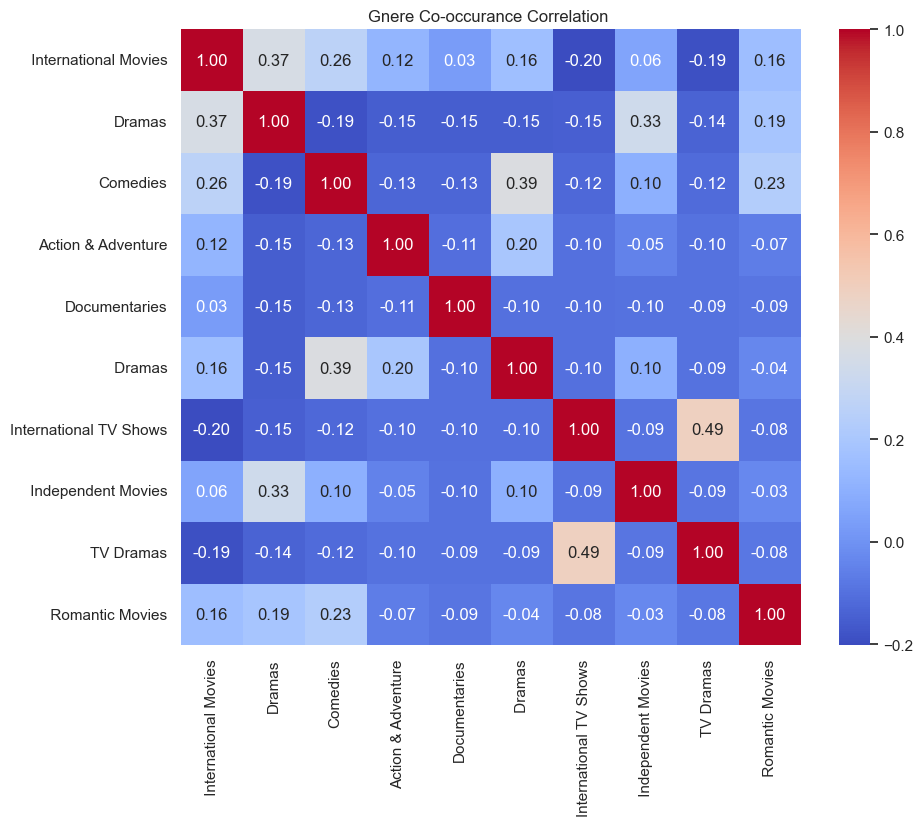

In [36]:
genre_split =df['listed_in'].str.get_dummies(sep=',')
genre_corr = genre_split.corr()

top_genres = genre_split.sum().sort_values(ascending=False).head(10).index
top_corr = genre_corr.loc[top_genres,top_genres]


plt.figure(figsize=(10,8))
sns.heatmap(top_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Gnere Co-occurance Correlation ')
plt.show()

7. Top Directors with Most Content

C:\Users\VINOD\AppData\Local\Temp\ipykernel_11236\3340341692.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')


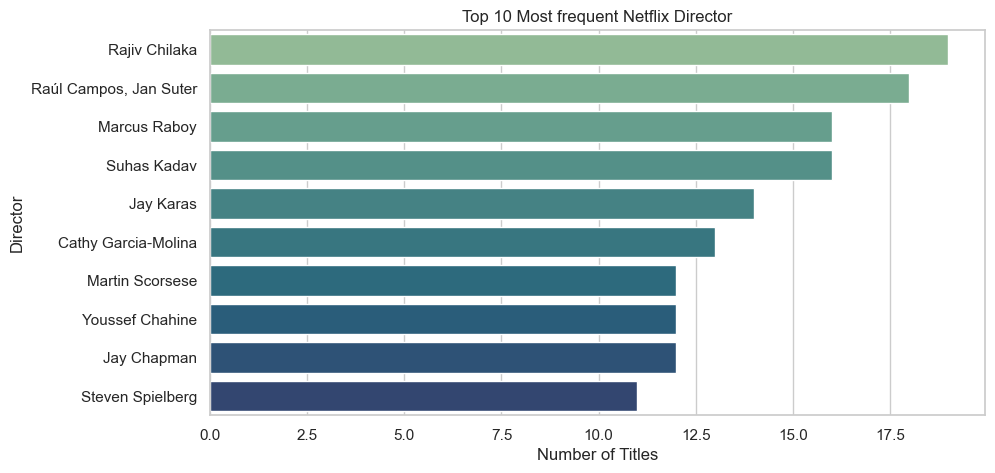

In [39]:
top_directors = df[df['director']!= 'No Director']['director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')
plt.title('Top 10 Most frequent Netflix Director')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()